In [21]:
from pylab import *
import random_idx
import time
%matplotlib notebook
from __future__ import division
import scipy

plt.rcParams.update({'axes.titlesize': 'xx-large'})
plt.rcParams.update({'axes.labelsize': 'xx-large'})
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large'})
plt.rcParams.update({'legend.fontsize': 'x-large'})


In [3]:
def ncdf(z):
    return 0.5 * (1 + scipy.special.erf(z/2**0.5))

def p_correct_l(M, N=10000, D=27, ares=2000):
    M = np.array(M)
    p = np.zeros((ares-1, len(M)))

    for iM,Mval in enumerate(M):
        avals = np.linspace(N - 8 * (N*Mval)**0.5, N + 8 * (N*Mval)**0.5, ares)
        
        p[:, iM] = ncdf((avals[1:]-N) / ((Mval-1)*N)**0.5) - ncdf((avals[:-1]-N) / ((Mval-1)*N)**0.5)
        p[:, iM] *= (ncdf(np.mean(np.vstack((avals[1:], avals[:-1])), axis=0)/(Mval*N)**0.5)) ** (D-1)

    return np.sum(p, axis=0)

In [4]:
h = np.load('data/p_correct-theory-N=12-D=16-n160503.npz')
p_correct = h['p_correct']
test_N = h['test_N']
test_D = h['test_D']

<IPython.core.display.Javascript object>


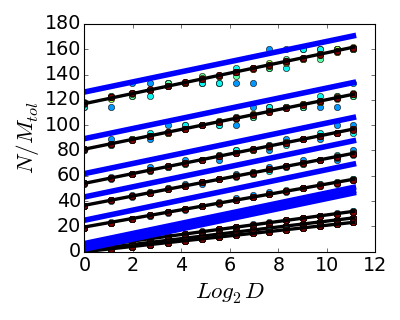

p_tol=1.00000: N = M * ( 4.02 log2(D) + 116.99 )
p_tol=1.00000: N = M * ( 3.91 log2(D) + 81.02 )
p_tol=1.00000: N = M * ( 3.87 log2(D) + 54.02 )
p_tol=0.99999: N = M * ( 3.71 log2(D) + 36.64 )
p_tol=0.99900: N = M * ( 3.40 log2(D) + 19.52 )
p_tol=0.90000: N = M * ( 2.58 log2(D) + 3.31 )
p_tol=0.80000: N = M * ( 2.31 log2(D) + 1.12 )
p_tol=0.70000: N = M * ( 2.09 log2(D) + 0.02 )


In [6]:
import scipy
from scipy import stats

test_p_tol = [1-1e-14, 1-1e-10, 1-1e-7, 1-1e-5, 1-1e-3, 1-1e-1, 1-2e-1, 1-3e-1]

figure(figsize=(5,4))

cm = get_cmap('jet', len(test_N))

stN=3
p_tol_M = np.zeros((len(test_N), len(test_D), len(test_p_tol)))
slD = np.nan*np.zeros((len(test_N), len(test_p_tol)))
intD = np.nan*np.zeros((len(test_N), len(test_p_tol)))

for ip, p_tol in enumerate(test_p_tol[0:]):
    #for iN,N in enumerate(test_N):
    for iN in range(stN, len(test_N)):
        N = test_N[iN]
        for iD,D in enumerate(test_D):
            m_idx = np.nonzero(np.squeeze(p_correct[iN, iD, :]) < p_tol)[0]
            if len(m_idx) < 1:
                p_tol_M[iN, iD, ip] = N
            else:
                p_tol_M[iN, iD, ip] = m_idx[0]
            
        xD = np.log(np.array(test_D)-1)
        yD = N / p_tol_M[iN, :, ip]
        slD[iN, ip], intD[iN, ip], r, p, err = stats.linregress(xD, yD)
        
        plot(xD, yD, 'o', color=cm(iN), label="N=%2d" % N)
        #plot(xD, slD[iN, ip] * xD + intD[iN, ip], color=cm(iN))
       
    plot(xD, np.nanmean(slD[:,ip]) *xD + np.nanmean(intD[:,ip]), 'k', lw=3)

    
    thD = np.array(test_D)
    eps_tol = 1 - p_tol
    yTheory =  4 * (np.log(thD-1) - np.log(2*eps_tol))
    #yTheory =  - 4 * np.log(sqrt(2*eps_tol/(thD-1)+0.25) -0.5)   
                    
    plot(np.log(thD-1), yTheory, 'b', lw=5)

    print "p_tol=%.5f: N = M * ( %2.2f log2(D) + %2.2f )" % (p_tol, np.nanmean(slD[:,ip]), np.nanmean(intD[:,ip]))

xlabel('$Log_2 D$')
ylabel('$N/M_{tol}$')

plt.tight_layout()

savefig('figures/linear_NMtol_fit-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/linear_NMtol_fit-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

<IPython.core.display.Javascript object>


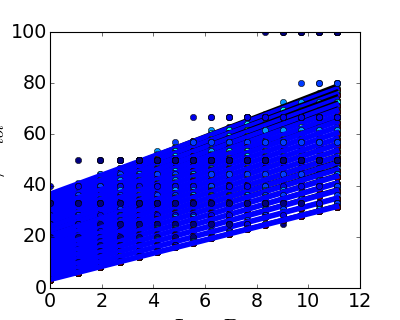

p_tol=0.99999: N = M * ( 3.88 log2(D) + 36.20 )
p_tol=0.99998: N = M * ( 3.85 log2(D) + 34.23 )
p_tol=0.99997: N = M * ( 3.82 log2(D) + 32.60 )
p_tol=0.99996: N = M * ( 3.76 log2(D) + 30.80 )
p_tol=0.99993: N = M * ( 3.70 log2(D) + 29.11 )
p_tol=0.99989: N = M * ( 3.59 log2(D) + 27.62 )
p_tol=0.99982: N = M * ( 3.60 log2(D) + 25.58 )
p_tol=0.99970: N = M * ( 3.46 log2(D) + 24.20 )
p_tol=0.99952: N = M * ( 3.43 log2(D) + 22.41 )
p_tol=0.99922: N = M * ( 3.39 log2(D) + 20.75 )
p_tol=0.99873: N = M * ( 3.41 log2(D) + 18.64 )
p_tol=0.99793: N = M * ( 3.33 log2(D) + 17.01 )
p_tol=0.99664: N = M * ( 3.31 log2(D) + 15.08 )
p_tol=0.99454: N = M * ( 3.26 log2(D) + 13.32 )
p_tol=0.99114: N = M * ( 3.21 log2(D) + 11.46 )
p_tol=0.98562: N = M * ( 3.10 log2(D) + 9.80 )
p_tol=0.97664: N = M * ( 2.99 log2(D) + 8.17 )
p_tol=0.96207: N = M * ( 2.90 log2(D) + 6.46 )
p_tol=0.93842: N = M * ( 2.74 log2(D) + 4.94 )
p_tol=0.90000: N = M * ( 2.62 log2(D) + 3.25 )


In [5]:
import scipy
from scipy import stats

test_p_tol = 1 - np.logspace(-5, -1, 20)

figure(figsize=(5,4))

cm = get_cmap('jet', len(test_N))

stN=0
p_tol_M = np.zeros((len(test_N), len(test_D), len(test_p_tol)))
slD = np.nan*np.zeros((len(test_N), len(test_p_tol)))
intD = np.nan*np.zeros((len(test_N), len(test_p_tol)))

alpha_coeff = np.zeros((len(test_N), len(test_p_tol)))
beta_coeff = np.zeros((len(test_N), len(test_p_tol)))
                       

for ip, p_tol in enumerate(test_p_tol[0:]):
    #for iN,N in enumerate(test_N):
    eps_tol = 1 - p_tol
    for iN in range(stN, len(test_N)):
        N = test_N[iN]
        for iD,D in enumerate(test_D):
            m_idx = np.nonzero(np.squeeze(p_correct[iN, iD, :]) < p_tol)[0]
            if len(m_idx) < 1:
                p_tol_M[iN, iD, ip] = N
            else:
                p_tol_M[iN, iD, ip] = m_idx[0]
            
        xD = np.log(np.array(test_D)-1)
        yD = N / p_tol_M[iN, :, ip]
        slD[iN, ip], intD[iN, ip], r, p, err = stats.linregress(xD, yD)
        
        alpha_coeff[iN, ip] = slD[iN, ip] / 4
        beta_coeff[iN, ip] = -intD[iN, ip] / 4 / np.log(2*eps_tol)
        
        plot(xD, yD, 'o', color=cm(iN), label="N=%2d" % N)
        #plot(xD, slD[iN, ip] * xD + intD[iN, ip], color=cm(iN))
       
    plot(xD, np.nanmean(slD[:,ip]) *xD + np.nanmean(intD[:,ip]), 'k', lw=3)

    thD = np.array(test_D)
   
    yTheory =  4 * (alpha_coeff[iN, ip] * np.log(thD-1) - beta_coeff[iN, ip] * np.log(2*eps_tol))
    #yTheory =  - 4 * np.log(sqrt(2*eps_tol/(thD-1)+0.25) -0.5)   
                    
    plot(np.log(thD-1), yTheory, 'b', lw=5)

    print "p_tol=%.5f: N = M * ( %2.2f log2(D) + %2.2f )" % (p_tol, np.nanmean(slD[:,ip]), np.nanmean(intD[:,ip]))

xlabel('$Log_2 D$')
ylabel('$N/M_{tol}$')

savefig('figures/linear_NMtol_fit-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/linear_NMtol_fit-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

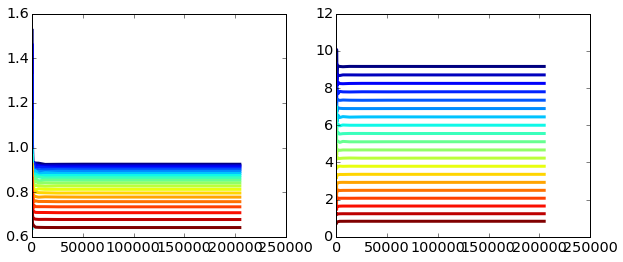

In [101]:
figure(figsize=(10,4))

subplot(121)
cm = plt.get_cmap('jet', len(test_p_tol))

for ip, p_tol in enumerate(test_p_tol):
    plot(test_N, alpha_coeff[:, ip], lw=3, color=cm(ip))
    
subplot(122)
for ip, p_tol in enumerate(test_p_tol):
    plot(test_N, beta_coeff[:, ip], lw=3, color=cm(ip))


<IPython.core.display.Javascript object>


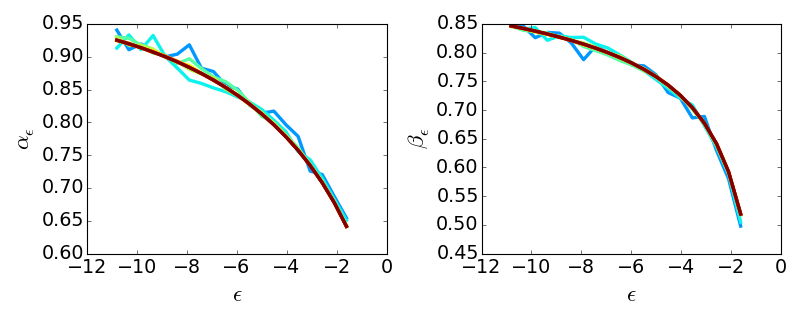

In [19]:
figure(figsize=(10,4))

subplot(121)
cm = plt.get_cmap('jet', len(test_N))

stN = 3

sl_alpha = nan*np.zeros(len(test_N))
int_alpha = nan*np.zeros(len(test_N))
sl_beta = nan*np.zeros(len(test_N))
int_beta = nan*np.zeros(len(test_N))

eps_tol = 1-np.array(test_p_tol)
xD = np.log(2*eps_tol)

for iN in range(stN, len(test_N)):
    
    plot(np.log(2*eps_tol), alpha_coeff[iN, :], lw=3, color=cm(iN))


ylabel(r'$\alpha_\epsilon$')
xlabel('$\epsilon$')

subplot(122)
for iN in range(stN, len(test_N)):
    plot(np.log(2*eps_tol), beta_coeff[iN, :], lw=3, color=cm(iN))
    
ylabel(r'$\beta_\epsilon$')
xlabel('$\epsilon$')
plt.tight_layout()


savefig('figures/epsilon_coefficient-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/epsilon_coefficient-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

<IPython.core.display.Javascript object>


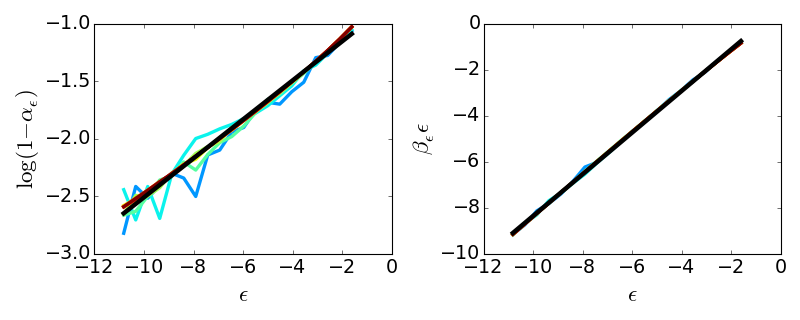

In [22]:
figure(figsize=(10,4))

subplot(121)
cm = plt.get_cmap('jet', len(test_N))

stN = 3

sl_alpha = nan*np.zeros(len(test_N))
int_alpha = nan*np.zeros(len(test_N))
sl_beta = nan*np.zeros(len(test_N))
int_beta = nan*np.zeros(len(test_N))

eps_tol = 1-np.array(test_p_tol)
xD = np.log(2*eps_tol)

for iN in range(stN, len(test_N)):
    
    plot(np.log(2*eps_tol), np.log(1-alpha_coeff[iN, :]), lw=3, color=cm(iN))

    yD = np.log(1-alpha_coeff[iN,:])
    sl_alpha[iN], int_alpha[iN], r, p, err = stats.linregress(xD, yD)


plot(xD, np.nanmean(sl_alpha) * xD + np.nanmean(int_alpha), 'k', lw=4)
    
ylabel(r'$\log(1-\alpha_\epsilon)$')
xlabel('$\epsilon$')

subplot(122)
for iN in range(stN, len(test_N)):
    plot(np.log(2*eps_tol), beta_coeff[iN, :]*np.log(2*eps_tol), lw=3, color=cm(iN))
    
    yD = beta_coeff[iN,:]*np.log(2*eps_tol)
    
    sl_beta[iN], int_beta[iN], r, p, err = stats.linregress(xD, yD)
    
plot(xD, np.nanmean(sl_beta) * xD + np.nanmean(int_beta), 'k', lw=4)

ylabel(r'$\beta_\epsilon \epsilon$')
xlabel('$\epsilon$')
plt.tight_layout()


savefig('figures/epsilon_coefficient_fit-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/epsilon_coefficient_fit-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

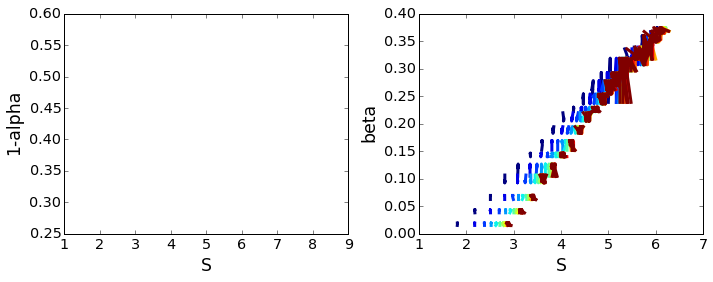

In [321]:
figure(figsize=(10,4))

subplot(121)
cm = plt.get_cmap('jet', len(test_N))

stN = 3

sl_alpha = nan*np.zeros((len(test_D), len(test_p_tol)))
int_alpha = nan*np.zeros((len(test_D), len(test_p_tol)))
sl_beta = nan*np.zeros((len(test_D), len(test_p_tol)))
int_beta = nan*np.zeros((len(test_D), len(test_p_tol)))

iD=2
S = np.zeros((len(test_D), len(test_p_tol)))
for iD in range(len(test_D)):
    for ip in range(len(test_p_tol)):
        S[iD,ip] = np.sqrt(test_N[-3] / p_tol_M[-3, iD, ip])
        
        
        plot((S**2-np.log(test_D[iD]-1)/2)**0.5, (1-alpha_coeff[-3, ip])**0.5, lw=3, color=cm(iD))

        #xD = S - np.log(test_D[iD]-1)/4
        #yD = np.log(1-alpha_coeff[-3,ip])
        #sl_alpha[iD,ip], int_alpha[iD,ip], r, p, err = stats.linregress(xD, yD)


plot(xD, np.nanmean(sl_alpha) * xD + np.nanmean(int_alpha), 'k', lw=4)
    
ylabel('1-alpha')
xlabel('S')

subplot(122)
for iD in range(len(test_D)):
    for ip in range(len(test_p_tol)):
        S = np.sqrt(test_N[stN:] / p_tol_M[stN:, iD, ip])
        plot((S-np.log(test_D[iD]-1)/4), beta_coeff[stN:, ip]**6, lw=3, color=cm(iD))

    
plot(xD, np.nanmean(sl_beta) * xD + np.nanmean(int_beta), 'k', lw=4)

ylabel('beta')
xlabel('S')
plt.tight_layout()


In [237]:
p_tol_M.shape

(12, 16, 20)

In [290]:
0.01**1.17

0.004570881896148752

In [291]:
(2*0.01)**(2*0.01)

0.9247420362361861

In [327]:
print np.nanmean(sl_alpha), np.nanmean(int_alpha)
print np.nanmean(sl_beta), np.nanmean(int_beta)

0.169668820753 -0.813405401862
0.906873667014 0.711709944353


In [326]:
print np.nanmean(sl_alpha), np.exp(np.nanmean(int_alpha))
print np.nanmean(sl_beta), np.nanmean(int_beta)

0.169668820753 0.443345722267
0.906873667014 0.711709944353



$$
\frac{N}{4M} = \alpha \log (D-1) - \beta \log (2\epsilon) - \gamma \log (D-1) (2\epsilon)^\rho - \delta
$$

(1.0, 10000)

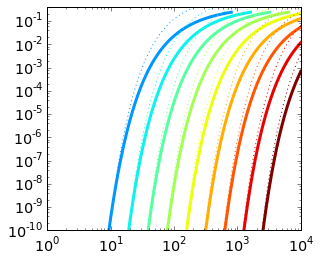

In [336]:
figure(figsize=(10,4))

M = np.arange(p_correct.shape[2])

subplot(121)
cm = plt.get_cmap('jet', len(test_N))

beta_c = np.nanmean(sl_beta)
gamma_c = np.exp(np.nanmean(int_alpha))
delta_c = np.nanmean(int_beta)
rho_c = np.nanmean(sl_alpha)

stN = 3
iD = 0
for iN in range(stN, len(test_N)):
    Mv = M[0:test_N[iN]]
    plot(Mv, 1-p_correct[iN, iD, 0:test_N[iN]], lw=3, color=cm(iN))
    
    #eps_approx1 = = 1 - np.exp(-0.5 * np.exp(-test_N/M[0:test_N[iN]]/4))**((test_D[iD]-1)*
    eps_approx = 0.5 * np.exp(-1/beta_c * (test_N[iN]/4/Mv - delta_c))
    
    plot(Mv, eps_approx, ':', color=cm(iN))

ylim([1e-10, 0.4])
yscale('log')
xscale('log')
xlim([0,10000])

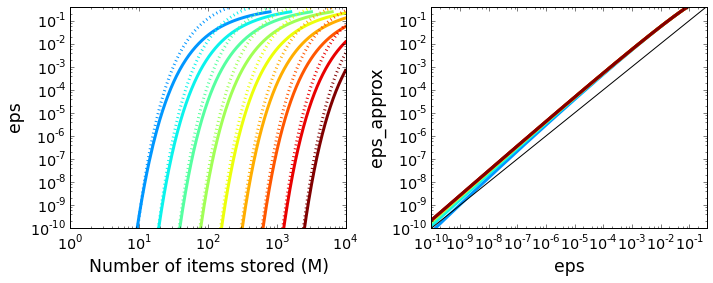

In [366]:
figure(figsize=(10,4))

M = np.arange(p_correct.shape[2])

cm = plt.get_cmap('jet', len(test_N))

beta_c = np.nanmean(sl_beta)
gamma_c = np.exp(np.nanmean(int_alpha))
delta_c = np.nanmean(int_beta)
rho_c = np.nanmean(sl_alpha)

stN = 3
iD = 0
for iN in range(stN, len(test_N)):
    Mv = M[0:test_N[iN]]    
    #eps_approx1 = = 1 - np.exp(-0.5 * np.exp(-test_N/M[0:test_N[iN]]/4))**((test_D[iD]-1)*
    eps_approx = 0.5 * (test_D[iD]-1)**((1-gamma_c)/beta_c) * np.exp(-1/beta_c * (test_N[iN]/4/Mv - delta_c))
    
    ax1 = subplot(121)
    plot(Mv, 1-p_correct[iN, iD, 0:test_N[iN]], lw=3, color=cm(iN))
    plot(Mv, eps_approx, ':', color=cm(iN), lw=3)
    
    ax2 = subplot(122)
    plot(1-p_correct[iN, iD, Mv], eps_approx, color=cm(iN), lw=3)

ax1.set_ylim([1e-10, 0.4])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim([0,10000])
ax1.set_xlabel('Number of items stored (M)')
ax1.set_ylabel('eps')


ax2.plot([1e-10, 0.4], [1e-10, 0.4], 'k')
ax2.set_xlim([1e-10, 0.4])
ax2.set_ylim([1e-10, 0.4])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('eps')
ax2.set_ylabel('eps_approx')

plt.tight_layout()

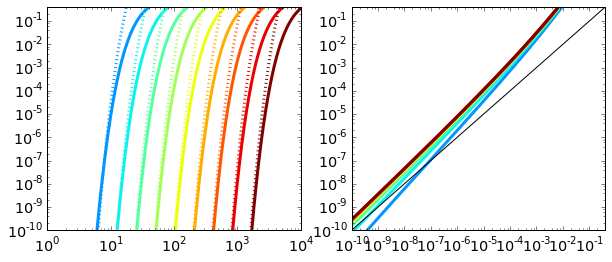

In [368]:
figure(figsize=(10,4))

M = np.arange(p_correct.shape[2])

cm = plt.get_cmap('jet', len(test_N))

beta_c = np.nanmean(sl_beta)
#gamma_c = np.exp(np.nanmean(int_alpha))
gamma_c = 0
delta_c = np.nanmean(int_beta)
rho_c = np.nanmean(sl_alpha)

stN = 3
iD = 14
for iN in range(stN, len(test_N)):
    Mv = M[0:test_N[iN]]    
    #eps_approx1 = = 1 - np.exp(-0.5 * np.exp(-test_N/M[0:test_N[iN]]/4))**((test_D[iD]-1)*
    eps_approx = 0.5 * (test_D[iD]-1)**((1-gamma_c)/beta_c) * np.exp(-1/beta_c * (test_N[iN]/4/Mv - delta_c))
    
    ax1 = subplot(121)
    plot(Mv, 1-p_correct[iN, iD, 0:test_N[iN]], lw=3, color=cm(iN))
    plot(Mv, eps_approx, ':', color=cm(iN), lw=3)
    
    ax2 = subplot(122)
    plot(1-p_correct[iN, iD, Mv], eps_approx, color=cm(iN), lw=3)

ax1.set_ylim([1e-10, 0.4])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim([0,10000])

ax2.plot([1e-10, 0.4], [1e-10, 0.4], 'k')
ax2.set_xlim([1e-10, 0.4])
ax2.set_ylim([1e-10, 0.4])
ax2.set_yscale('log')
ax2.set_xscale('log')

In [334]:
test_D

array([    2,     4,     8,    16,    32,    64,   128,   256,   512,
        1024,  2048,  4096,  8192, 16384, 32768, 65536])

In [292]:
import scipy
from scipy import stats

tD = np.array(test_D)

approx1_p_tol = np.zeros((len(test_N), len(test_D), len(test_p_tol)))
approx2_p_tol = np.zeros((len(test_N), len(test_D), len(test_p_tol)))
approx3_p_tol = np.zeros((len(test_N), len(test_D), len(test_p_tol)))
approx4_p_tol = np.zeros((len(test_N), len(test_D), len(test_p_tol)))

stN=2                     

for ip, p_tol in enumerate(test_p_tol[0:]):
    #for iN,N in enumerate(test_N):
    eps_tol = 1 - p_tol
    
    for iN in range(stN, len(test_N)):
        N = test_N[iN]
        S = N / p_tol_M[iN, :, ip]
    
        ap1 = np.exp((-1)/2 * np.exp(-S/4/beta_coeff[iN,ip])) ** ((tD-1) ** (alpha_coeff[iN,ip]/beta_coeff[iN,ip]))
        #ap2 = ncdf((S/2/beta_coeff[iN,ip])**0.5) ** ((tD-1) ** (alpha_coeff[iN,ip]/beta_coeff[iN,ip]))
        ap2 = ncdf((S/2/1)**0.5) ** ((tD-1) ** (alpha_coeff[iN,ip]/1))
        ap3 = (tD-1) ** (alpha_coeff[iN,ip]/beta_coeff[iN,ip]) * np.exp(-S/beta_coeff[iN,ip]/4)
        ap4 = 0.5 * (tD-1)**(1/0.9) * np.exp(0.71 - S)
        
        approx1_p_tol[iN,:,ip] = ap1
        approx2_p_tol[iN,:,ip] = ap2
        approx3_p_tol[iN,:,ip] = 1 - ap3/2
        approx4_p_tol[iN,:,ip] = 1 - ap4
    


(1e-05, 0.1)

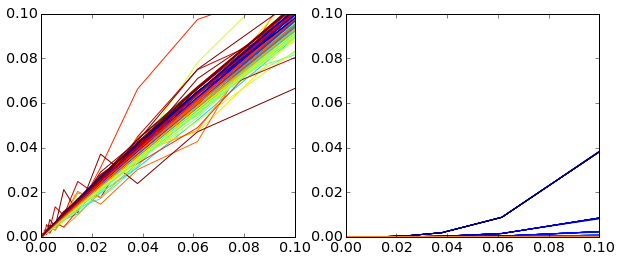

In [293]:
cm = get_cmap('jet', len(test_D))

figure(figsize=(10,4))
subplot(121)
plot([0, 0.1], [0, 0.1], 'k')

for iN in range(stN, len(test_N)):
    for iD in range(len(test_D)):
        plot(1-test_p_tol, 1-approx1_p_tol[iN, iD,:], color=cm(iD))
xlim([1e-5, 1e-1])
ylim([1e-5, 1e-1])
#xscale('log')
#yscale('log')

subplot(122)
#plot([0, 0.1], [0, 0.1], 'k')
for iN in range(stN, len(test_N)):
    for iD in range(len(test_D)):
        plot(1-test_p_tol, 1-approx4_p_tol[iN, iD,:], color=cm(iD))
xlim([1e-5, 1e-1])
ylim([1e-5, 1e-1])
#xscale('log')
#yscale('log')

In [230]:
test_D

array([    2,     4,     8,    16,    32,    64,   128,   256,   512,
        1024,  2048,  4096,  8192, 16384, 32768, 65536])

p_tol=0.99999: N = M * ( 3.88 log2(D) + 36.20 )
p_tol=0.99998: N = M * ( 3.85 log2(D) + 34.23 )
p_tol=0.99997: N = M * ( 3.82 log2(D) + 32.60 )
p_tol=0.99996: N = M * ( 3.76 log2(D) + 30.80 )
p_tol=0.99993: N = M * ( 3.70 log2(D) + 29.11 )
p_tol=0.99989: N = M * ( 3.59 log2(D) + 27.62 )
p_tol=0.99982: N = M * ( 3.60 log2(D) + 25.58 )
p_tol=0.99970: N = M * ( 3.46 log2(D) + 24.20 )
p_tol=0.99952: N = M * ( 3.43 log2(D) + 22.41 )
p_tol=0.99922: N = M * ( 3.39 log2(D) + 20.75 )
p_tol=0.99873: N = M * ( 3.41 log2(D) + 18.64 )
p_tol=0.99793: N = M * ( 3.33 log2(D) + 17.01 )
p_tol=0.99664: N = M * ( 3.31 log2(D) + 15.08 )
p_tol=0.99454: N = M * ( 3.26 log2(D) + 13.32 )
p_tol=0.99114: N = M * ( 3.21 log2(D) + 11.46 )
p_tol=0.98562: N = M * ( 3.10 log2(D) + 9.80 )
p_tol=0.97664: N = M * ( 2.99 log2(D) + 8.17 )
p_tol=0.96207: N = M * ( 2.90 log2(D) + 6.46 )
p_tol=0.93842: N = M * ( 2.74 log2(D) + 4.94 )
p_tol=0.90000: N = M * ( 2.62 log2(D) + 3.25 )


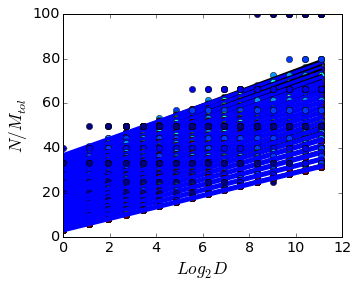

In [71]:
import scipy
from scipy import stats

test_p_tol = 1 - np.logspace(-5, -1, 20)

figure(figsize=(5,4))

cm = get_cmap('jet', len(test_N))

stN=0
p_tol_M = np.zeros((len(test_N), len(test_D), len(test_p_tol)))
slD = np.nan*np.zeros((len(test_N), len(test_p_tol)))
intD = np.nan*np.zeros((len(test_N), len(test_p_tol)))

alpha_coeff = np.zeros((len(test_N), len(test_p_tol)))
beta_coeff = np.zeros((len(test_N), len(test_p_tol)))
                       

for iN in range(stN, len(test_N)):
    N = test_N[iN]
    for ip, p_tol in enumerate(test_p_tol[0:]):
        #for iN,N in enumerate(test_N):
        eps_tol = 1 - p_tol

        for iD,D in enumerate(test_D):
            m_idx = np.nonzero(np.squeeze(p_correct[iN, iD, :]) < p_tol)[0]
            if len(m_idx) < 1:
                p_tol_M[iN, iD, ip] = N
            else:
                p_tol_M[iN, iD, ip] = m_idx[0]
            
    #xD = np.log(np.array(test_D)-1)
    yD = N / p_tol_M[iN, :, :]
    x1 = 4 * np.log(np.array(test_D)-1)
    x2 = 4 * np.log(2*(1-np.array(test_p_tol)))
    
    
    #slD[iN, ip], intD[iN, ip], r, p, err = stats.linregress(xD, yD)
        
    alpha_coeff[iN, ip] = slD[iN, ip] / 4
    beta_coeff[iN, ip] = -intD[iN, ip] / 4 / np.log(2 * eps_tol)
       
    plot(xD, yD, 'o', color=cm(iN), label="N=%2d" % N)
    #plot(xD, slD[iN, ip] * xD + intD[iN, ip], color=cm(iN))
       
    plot(xD, np.nanmean(slD[:,ip]) *xD + np.nanmean(intD[:,ip]), 'k', lw=3)

    thD = np.array(test_D)
   
    yTheory =  4 * (alpha_coeff[iN, ip] * np.log(thD-1) - beta_coeff[iN, ip] * np.log(2*eps_tol))
    #yTheory =  - 4 * np.log(sqrt(2*eps_tol/(thD-1)+0.25) -0.5)   
                    
    plot(np.log(thD-1), yTheory, 'b', lw=5)

    print "p_tol=%.5f: N = M * ( %2.2f log2(D) + %2.2f )" % (p_tol, np.nanmean(slD[:,ip]), np.nanmean(intD[:,ip]))

xlabel('$Log_2 D$')
ylabel('$N/M_{tol}$')

savefig('figures/linear_NMtol_fit-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/linear_NMtol_fit-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

In [88]:
M.shape

(204800,)

In [90]:
test_D

array([    2,     4,     8,    16,    32,    64,   128,   256,   512,
        1024,  2048,  4096,  8192, 16384, 32768, 65536])